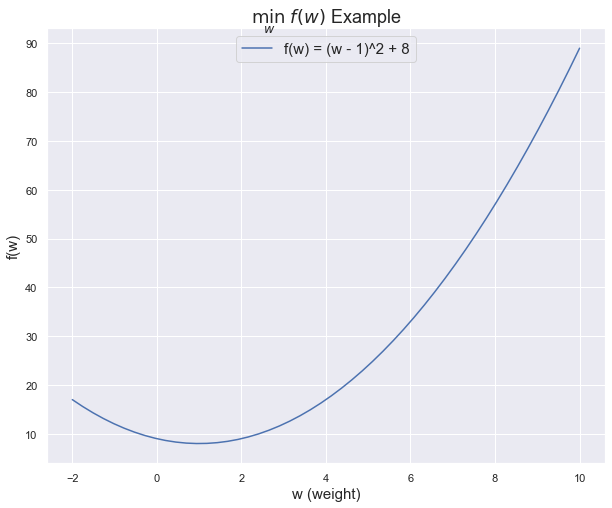

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


sns.set_theme()


def f(w):
    return (w - 1)**2  + 8


domain = np.linspace(-2, 10, 50)


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 1)^2 + 8")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

# 1 The Problem Description
Clearly the function  $𝑓(\omega)=(\omega−1)^2+8$  has a global minimum at  $\omega=1$ . Supposing we did not already know the answer, how could we find it? That is, we wish to solve:

$$min_{\omega∈ℝ}𝑓(\omega)   (PROBLEM 1)$$
 
This class of problems falls into the reahlm of unconstrained continuous optimization. 

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning; with some notable exceptions appearing in the literature. Noting these techniques, this notebook focuses on the notion of using the gradient (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function.

### Start with a Guess
Suppose we first guess that the minimum value of  $𝑓(\omega)$  occurs at  $\omega_0=5$ . 


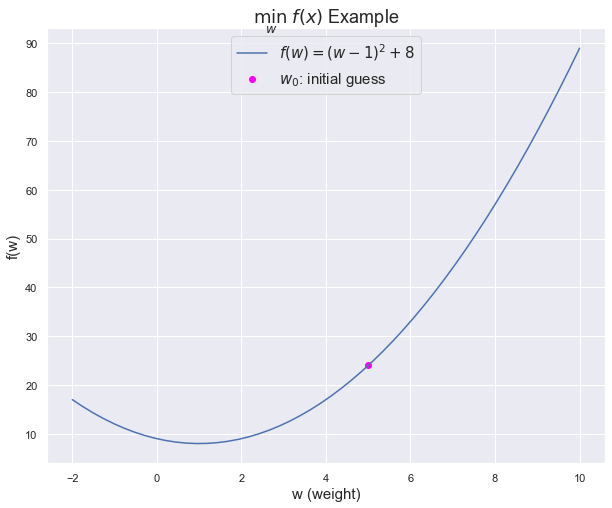

In [3]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()


### The General Idea

The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to provide a direction to explore (this means gradient descent is a first-order method). For example, with our function  $𝑓$  and initial guess  $\omega_0=5$ , suppose we are able to calculate the value of the gradient (the derivative) of  $𝑓$  at  $\omega_0=5$ . This numerical value will give us the slope of the tangent line to  $𝑓$  at  $\omega_0$ . Note that  $𝑓′(\omega)=2(\omega−1)$ .


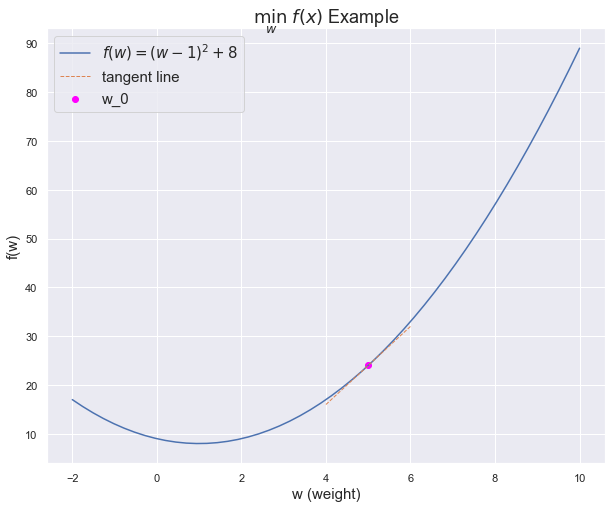

In [5]:

def df(w): 
    return 2*(w - 1)


w_0 = 5.0

def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):

    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"w_{i}")


plt.figure(figsize = (10, 8))

plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")

tangent_line(w_0, f, df)

plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()


# 2 Direction of Descent and the Learning Rate
Observing the figure generated by the code above, notice that the tangent line implies a direction of descent. That is, at the point  $(5,𝑓(5))$ , the tangent line has a positive slope. This indicates that we need move in the negative direction (to the left of $\omega_0=5$ ) if we wish to move to a smaller value of  $𝑓(\omega)$ . That is, we need to move in the direction opposite of the sign of the derivative of $𝑓(\omega)$  at  $\omega_0=5$ .

### But how far should we move?
The value of how far to move in the opposite sign of the derivative of  $𝑓(\omega)$  at  $\omega_0=5$  is called the learning rate (Nocedal & Wright call this hyperparameter the step length), and is typically denoted by  $\alpha$ . The process of multiplying the derivative of  $𝑓(\omega)$  at  $\omega_0=5$  by the learning rate and forming a new choice of  $\omega$  by subtracting this quantity from  $\omega_0$  is called gradient descent. For example, we may apply gradient descent at  $\omega_0$  and form a new  $\omega$ , say  $\omega_1$, with the following update:

$$\omega_{𝑛+1}=\omega_𝑛−𝛼𝑓′(\omega𝑛)$$ (Gradient Descent Update Rule for a Function of one Variable)
 
The choice of  $\alpha$  in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as line-search and trust-region methods (again see Nocedal & Wright).


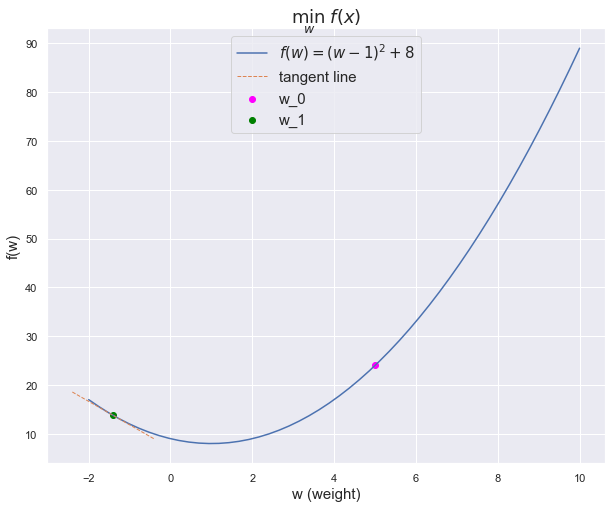

In [7]:

w_0 = 5.0

alpha = .8


w_1 = w_0 - alpha*df(w_0)


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")


tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")


plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

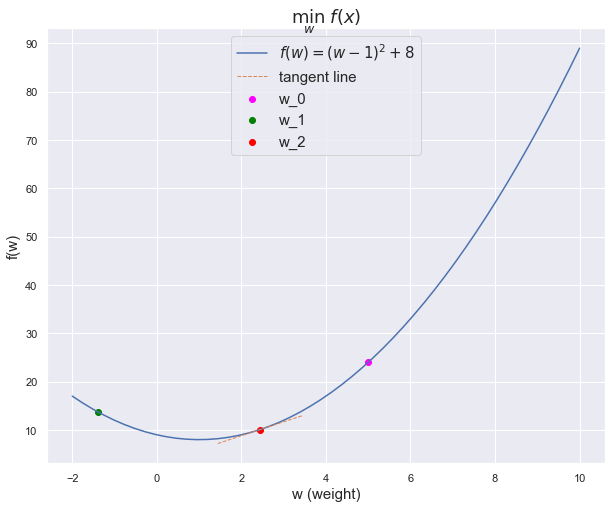

In [8]:

w_2 = w_1 - alpha*df(w_1)


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")


tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")


plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0
w_1 = -1.4000000000000004
w_2 = 2.4400000000000004
w_3 = 0.13599999999999968


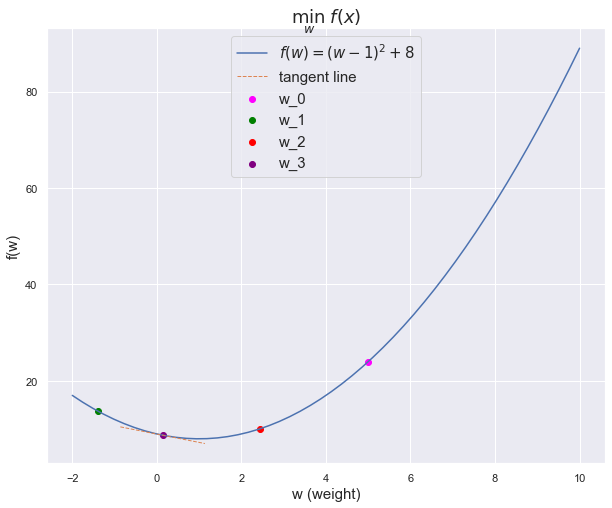

In [9]:
w_3 = w_2 - alpha*df(w_2)

print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")


tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")


plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

w_0 = 5.0 | df(w_0) = 8.0
w_1 = -1.4 | df(w_1) = -4.800000000000001
w_2 = 2.44 | df(w_2) = 2.880000000000001
w_3 = 0.14 | df(w_3) = -1.7280000000000006
w_4 = 1.52 | df(w_4) = 1.0368000000000004
w_5 = 0.69 | df(w_5) = -0.6220800000000004
w_6 = 1.19 | df(w_6) = 0.37324800000000025
w_7 = 0.89 | df(w_7) = -0.22394880000000006
w_8 = 1.07 | df(w_8) = 0.13436928000000004
w_9 = 0.96 | df(w_9) = -0.08062156799999998
w_10 = 1.02 | df(w_10) = 0.04837294080000021
w_11 = 0.99 | df(w_11) = -0.029023764480000214
w_12 = 1.01 | df(w_12) = 0.01741425868799995
w_13 = 0.99 | df(w_13) = -0.01044855521279997
w_14 = 1.0 | df(w_14) = 0.006269133127680071
w_15 = 1.0 | df(w_15) = -0.0037614798766081314
w_16 = 1.0 | df(w_16) = 0.00225688792596479
w_17 = 1.0 | df(w_17) = -0.0013541327555788296
w_18 = 1.0 | df(w_18) = 0.0008124796533470757



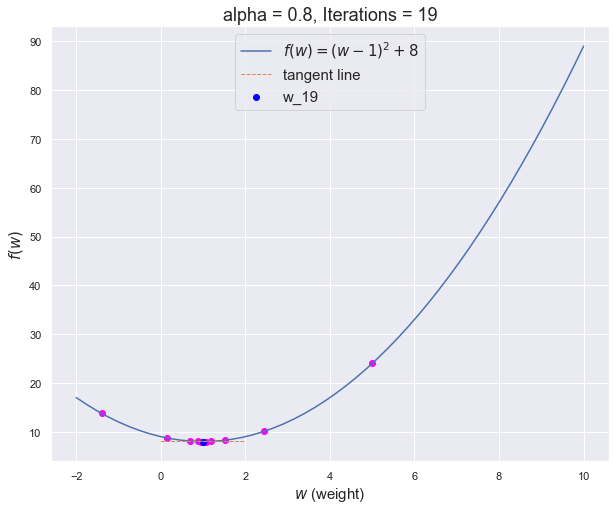

In [10]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 1)^2 + 8$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()

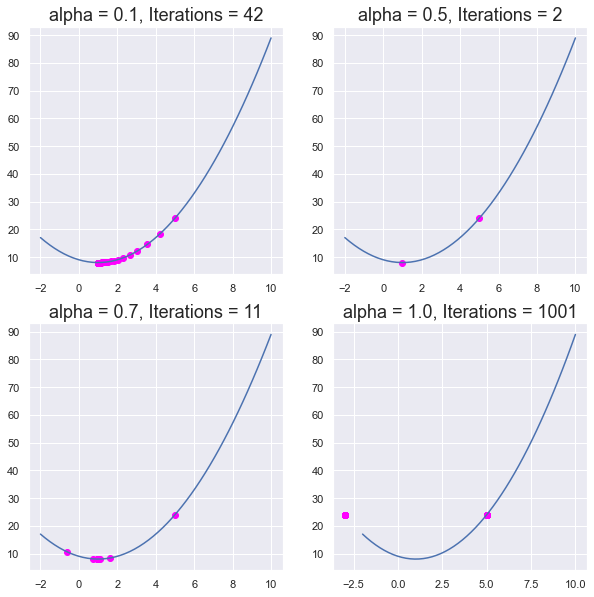

In [11]:

alphas = [0.1, 0.5, 0.7, 1.0]


fig, axs = plt.subplots(2, 2, figsize=(10,10))


for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


# 3 Minimizing Functions of Several Variables
All of the ideas above naturally generalize to functions of several variables when substituting the gradient for the single variable derivative. Before discussing this notion, we emphasize the general uncrontrained optimization problem:

$$min_{\omega∈ℝ𝕟}𝑓(\omega)(PROBLEM 2)$$
 
For instructional purposes we next give a specific solution to this problem by focusing on a function of two variables, though all notions covered extend to functions of an arbitrary and finite number of variables. In a general manor, gradient descent can now be defined in a meaningful sense:

$$\omega←\omega−\alpha∇𝑓(\omega)$$(True Gradient Descent)
 
With this multivariable gradient descent defined we now consider the multivariable function  $$𝑓(\omega_0,\omega_1)=\omega^2_0+\omega^2_1+1$$  which has an obvious minimum at the vector  $$\omega=[\omega_0,\omega_1]^𝑇$$ . To visualize this function run the following code in the cell below.

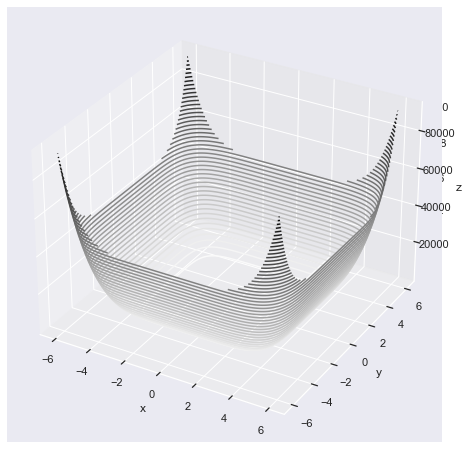

In [15]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 6 + w_1 ** 6 + 8

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

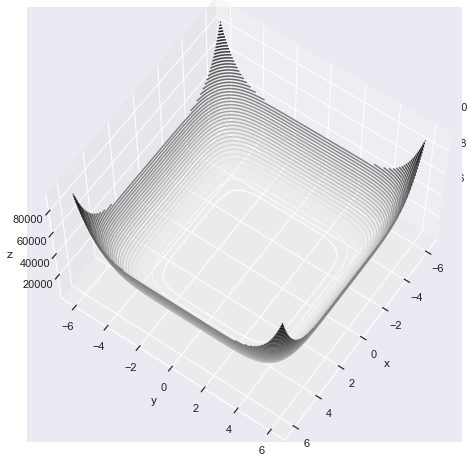

In [16]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

# True Gradient Descent
Now that we have a good visualization of our multivariable function we next define the derivative of our function and also update our gradient descent function to work with such functions. Next run the following code in the cell below.

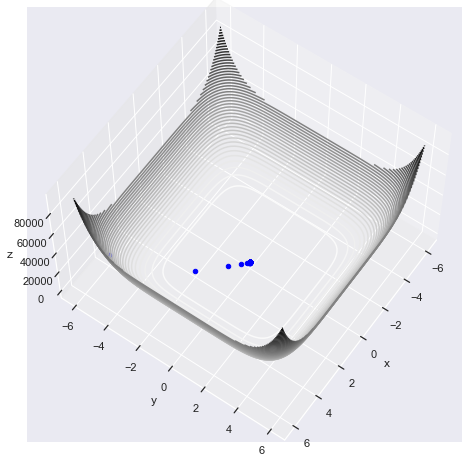

In [17]:
def df(w):
    grad = [6*w[0], 6*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()